# Create a neural network to solve the MNIST problem using Keras using ChatGPT

## Data

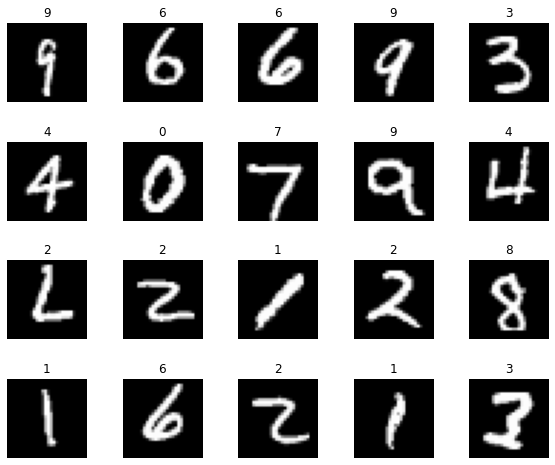

In [ ]:
# Select 20 random indexes from the train set
random_indices = np.random.randint(0, len(X_train), 20)

# Extract the 20 random images and labels from the train set
random_images = X_train[random_indices]
random_labels = y_train[random_indices]

# Plot the 20 random images
fig, axes = plt.subplots(4, 5, figsize=(10, 8))
axes = axes.ravel()

for i, ax in enumerate(axes):
    ax.imshow(random_images[i], cmap="gray")
    ax.axis('off')
    ax.set_title(str(random_labels[i]))

plt.subplots_adjust(hspace=0.5)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

# load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# normalize the pixel values (0-255) to be between 0 and 1
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

# define the model architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
          activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# compile the model
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

X_val = X_test[:2000]
y_val = y_test[:2000]
X_test = X_test[2000:]
y_test = y_test[2000:]

# train the model
history = model.fit(X_train, y_train, batch_size=32,
                    epochs=10, validation_data=(X_val, y_val))


2023-02-17 09:20:13.488303: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
1875/1875 [==============================] - 99s 52ms/step - loss: 0.1448 - accuracy: 0.9554 - val_loss: 0.0758 - val_accuracy: 0.9770
Epoch 2/10
1875/1875 [==============================] - 96s 51ms/step - loss: 0.0491 - accuracy: 0.9854 - val_loss: 0.0624 - val_accuracy: 0.9780
Epoch 3/10
1875/1875 [==============================] - 103s 55ms/step - loss: 0.0312 - accuracy: 0.9904 - val_loss: 0.0495 - val_accuracy: 0.9840
Epoch 4/10
1875/1875 [==============================] - 105s 56ms/step - loss: 0.0232 - accuracy: 0.9929 - val_loss: 0.0505 - val_accuracy: 0.9835
Epoch 5/10
1875/1875 [==============================] - 104s 55ms/step - loss: 0.0158 - accuracy: 0.9949 - val_loss: 0.0517 - val_accuracy: 0.9840
Epoch 6/10
1875/1875 [==============================] - 104s 55ms/step - loss: 0.0115 - accuracy: 0.9965 - val_loss: 0.0506 - val_accuracy: 0.9845
Epoch 7/10
1875/1875 [==============================] - 103s 55ms/step - loss: 0.0092 - accuracy: 0.9972 - val_loss: 0.0

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)


250/250 [==============================] - 4s 15ms/step - loss: 0.0396 - accuracy: 0.9912
Test accuracy: 0.9912499785423279


## plot the training and validation loss

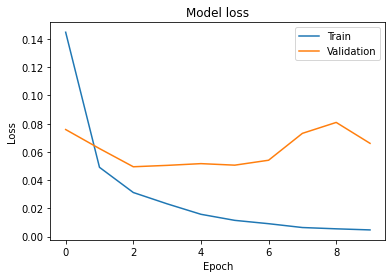

In [ ]:
# plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


### Summary

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 512)               2769408   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                        

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### Save model  

In [ ]:
model.save('model.h5')


### Prediction

In [ ]:
from keras.models import load_model


class Predictor:
    def __init__(self, model_path):
        self.model_path = model_path
        self.model = None

    def predict(self, image):
        # load the model from disk if it hasn't been loaded
        if self.model is None:
            self.model = load_model(self.model_path)

        # predict the image
        prediction = self.model.predict(image)

        # return the predicted label
        return np.argmax(prediction)


In [ ]:
# select 10 random images from the test set
random_indices = np.random.randint(0, len(X_test), 10)
random_images = X_test[random_indices]
random_labels = y_test[random_indices]

predictor = Predictor("model.h5")

for i in range(10):
    predicted_label = predictor.predict(random_images[i].reshape(1, 28, 28, 1))
    print("True Label: ", random_labels[i],
          "Predicted Label: ", predicted_label)


1/1 [==============================] - 1s 1s/step
True Label:  3 Predicted Label:  3
1/1 [==============================] - 0s 58ms/step
True Label:  4 Predicted Label:  4
1/1 [==============================] - 0s 73ms/step
True Label:  3 Predicted Label:  3
1/1 [==============================] - 0s 136ms/step
True Label:  7 Predicted Label:  7
1/1 [==============================] - 0s 114ms/step
True Label:  2 Predicted Label:  2
1/1 [==============================] - 0s 184ms/step
True Label:  4 Predicted Label:  4
1/1 [==============================] - 0s 303ms/step
True Label:  0 Predicted Label:  0
1/1 [==============================] - 0s 39ms/step
True Label:  7 Predicted Label:  7
1/1 [==============================] - 0s 124ms/step
True Label:  7 Predicted Label:  7
1/1 [==============================] - 0s 129ms/step
True Label:  7 Predicted Label:  7


250/250 [==============================] - 5s 16ms/step


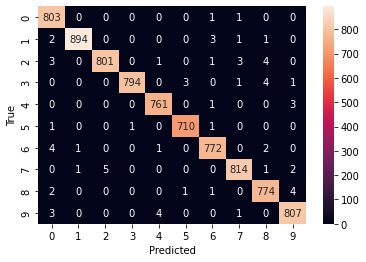

In [ ]:

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the test set
y_pred = model.predict(X_test)

# Convert the predicted probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


### Testing Google Colab integration 